# Predictive Maintenance of Gas Turbines

## Problem Statement

To predict the failure of Gas turbines between 40 to 0 days of actual failure. For example, if the actual failure of turbine happens on the 1st of Dec 2020, the model should be able to predict it's failure from the 22nd of Oct 2020.

## Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('default')

## Import Data

This dataset contains information from 10 gas turbines at a date level with 24 features (21 sensor readings and 3 operational settings) along with a status column which is marked as 1 if the gas turbine has failed or 0 if it is hasn't failed.

In [2]:
#Importing the data
df = pd.read_csv('predictive_maintenance_dataset.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,unit_number,time_stamp,status,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,unit_8,10/16/2016 12:00,0,25.0027,0.6205,Low,462.54,536.73,1262.93,1044.46,...,166.44,2028.34,7884.03,10.7829,0.02,305.0,1915.0,NaN,14.43,8.6603
1,unit_7,6/7/2015 12:00,0,0.0059,0.0002,High,518.67,642.25,1586.81,1396.02,...,523.53,2388.01,8144.85,8.3888,0.03,393.0,2388.0,100.0,39.14,23.5012
2,unit_2,8/6/2015 12:00,0,0.0007,0.0005,High,518.67,642.38,1576.64,1399.93,...,519.12,2387.59,8117.19,8.3958,0.03,389.0,2388.0,100.0,38.74,23.3277
3,unit_1,6/12/2017 12:00,0,0.0023,0.0000,NaN,NaN,641.85,1588.31,1392.98,...,523.42,2388.04,8139.72,8.3876,0.03,392.0,2388.0,100.0,39.12,23.5806
4,unit_2,7/7/2015 12:00,0,0.0021,0.0005,High,NaN,642.53,1584.98,1387.22,...,518.69,2387.68,8121.32,8.3965,0.03,390.0,2388.0,100.0,38.85,NaN


In [4]:
df.columns

Index(['unit_number', 'time_stamp', 'status', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            4831 non-null   object 
 1   time_stamp             4821 non-null   object 
 2   status                 4831 non-null   int64  
 3   operational_setting_1  4583 non-null   float64
 4   operational_setting_2  4600 non-null   float64
 5   operational_setting_3  4580 non-null   object 
 6   sensor_measurement_1   4591 non-null   float64
 7   sensor_measurement_2   4589 non-null   object 
 8   sensor_measurement_3   4583 non-null   float64
 9   sensor_measurement_4   4594 non-null   float64
 10  sensor_measurement_5   4561 non-null   float64
 11  sensor_measurement_6   4585 non-null   float64
 12  sensor_measurement_7   4576 non-null   float64
 13  sensor_measurement_8   4608 non-null   float64
 14  sensor_measurement_9   4590 non-null   float64
 15  sens

In [6]:
#summary statistics
df.describe(include='all')

,unit_number,time_stamp,status,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,4831,4821,4831.000000,4583.000000,4600.000000,4580,4591.000000,4589,4583.000000,4594.000000,...,4573.000000,4593,4601.000000,4584.000000,4561.000000,4590.000000,4575.000000,4594.000000,4608.000000,4591.000000
unique,10,1668,NaN,NaN,NaN,2,NaN,910,NaN,NaN,...,NaN,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unit_1,8/12/2016 12:00,NaN,NaN,NaN,High,NaN,642.27,NaN,NaN,...,NaN,2387.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,543,6,NaN,NaN,NaN,4308,NaN,42,NaN,NaN,...,NaN,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.001863,9.690675,0.229354,NaN,500.360022,NaN,1517.620039,1319.192523,...,420.787159,NaN,8111.488770,8.718166,0.027244,373.940305,2324.266667,99.097899,31.774249,19.070297
std,NaN,NaN,0.043126,15.054626,0.342113,NaN,27.903406,NaN,106.564322,124.176990,...,152.742055,NaN,67.143645,0.642894,0.004469,28.021727,120.469703,3.575423,10.902264,6.534802
min,NaN,NaN,0.000000,-0.008200,-0.000500,NaN,445.000000,NaN,1244.300000,1028.460000,...,129.060000,NaN,7857.730000,8.178700,0.020000,304.000000,1915.000000,84.930000,10.370000,6.160600
25%,NaN,NaN,0.000000,-0.000400,-0.000100,NaN,489.050000,NaN,1480.890000,1244.365000,...,315.460000,NaN,8100.280000,8.361475,0.020000,364.000000,2319.000000,100.000000,24.587500,14.757850
50%,NaN,NaN,0.000000,0.001800,0.000300,NaN,518.670000,NaN,1580.120000,1393.570000,...,520.640000,NaN,8132.700000,8.399050,0.030000,390.000000,2388.000000,100.000000,38.930000,23.358900
75%,NaN,NaN,0.000000,20.003000,0.620000,NaN,518.670000,NaN,1585.730000,1400.257500,...,523.130000,NaN,8142.100000,9.135725,0.030000,392.000000,2388.000000,100.000000,39.100000,23.461300


In [7]:
df['operational_setting_3'].value_counts()

High    4308
Low      272
Name: operational_setting_3, dtype: int64

### Pre-processing & Cleaning

In [8]:
#To check how many values are marked as 'error' as these changed the datatypes of the columns. 
#For now we will consider this as blanks/nans/Nulls
print(len(df[df['sensor_measurement_2']=='error'])) 
print(len(df[df['sensor_measurement_13']=='error']))

10
10


In [9]:
#Convert 'error vlaues' to nan
df.loc[df['sensor_measurement_2'] =='error', 'sensor_measurement_2'] = np.nan  
df.loc[df['sensor_measurement_13'] =='error', 'sensor_measurement_13'] = np.nan

#Convert low and high to 0 and 1
df.loc[df['operational_setting_3'] == 'Low', 'operational_setting_3'] = 0 
df.loc[df['operational_setting_3'] == 'High', 'operational_setting_3'] = 1

#Convert to float so it is uniform for analysis and model building
df['operational_setting_3'] = df['operational_setting_3'].astype(float)  #convert string columns types to float
df['sensor_measurement_2'] = df['sensor_measurement_2'].astype(float)
df['sensor_measurement_13'] = df['sensor_measurement_13'].astype(float)

#Convert to the YYYY-MM-DD
df['time_stamp'] = df['time_stamp'].apply(pd.to_datetime) # convert object to datetime

#Remove records which do not have a date (These are mostly records which have value after the turbine has had a failure)
df = df[~df['time_stamp'].isnull()]

In [10]:
#Find features whose datatype is float
cont_features = [feature for feature in df.columns if df[feature].dtypes == 'float64']
print(cont_features)
print(len(cont_features))

['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']
24


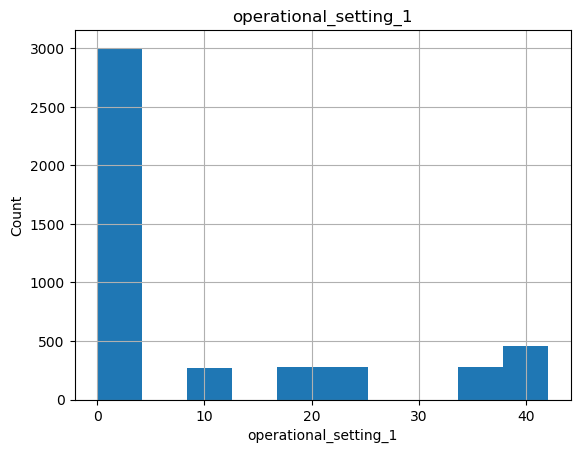

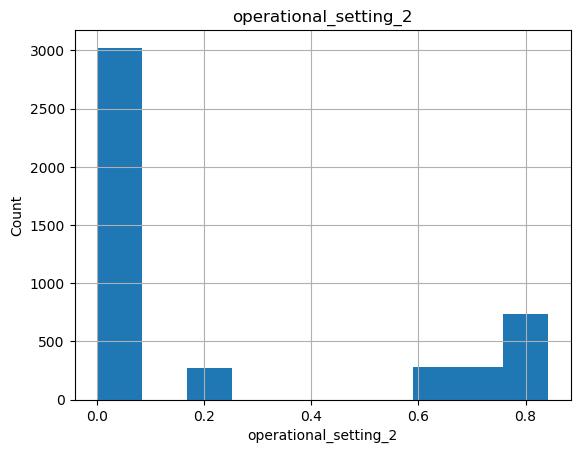

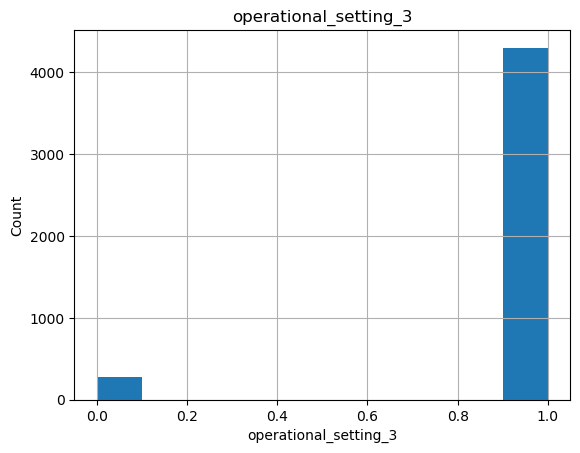

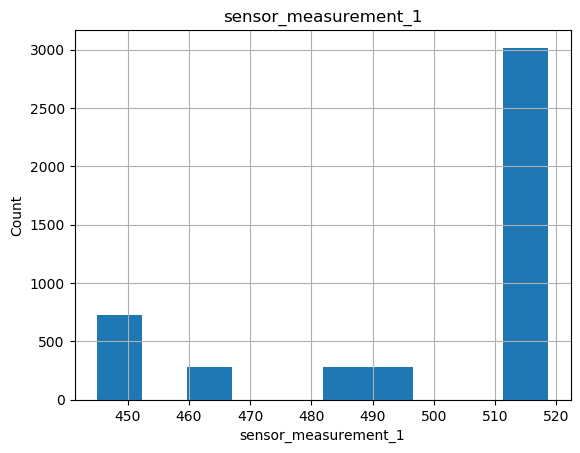

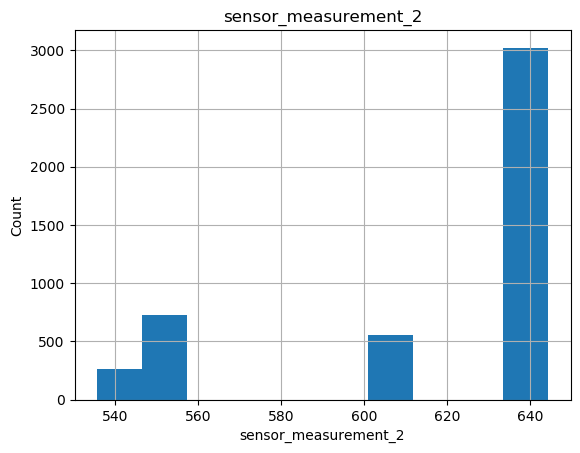

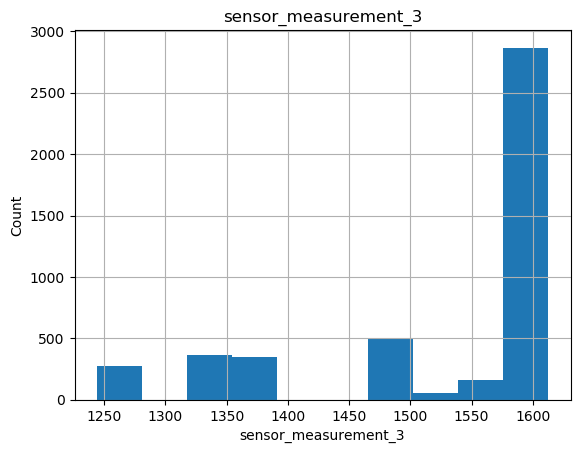

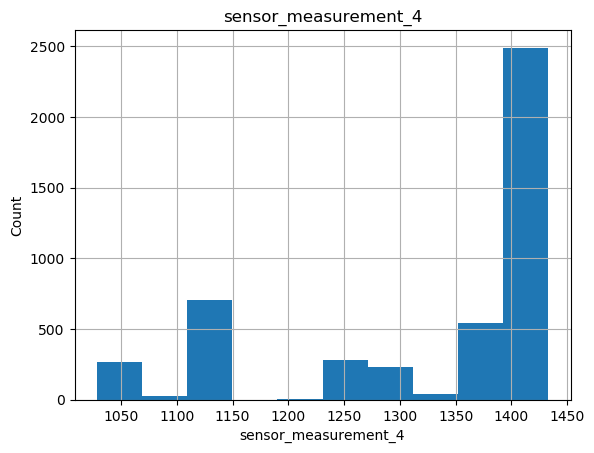

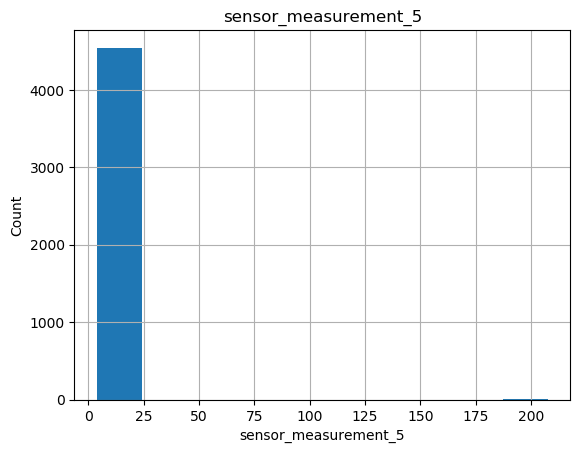

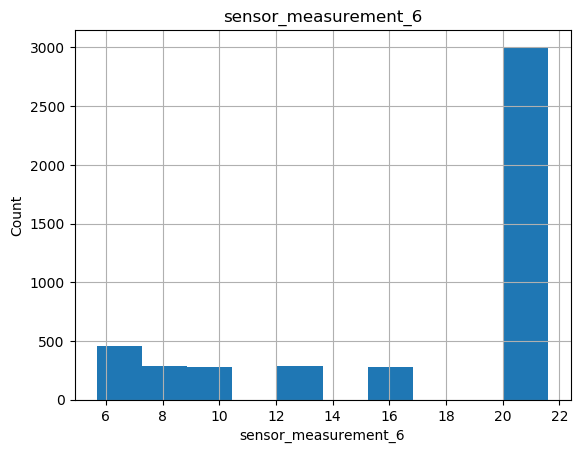

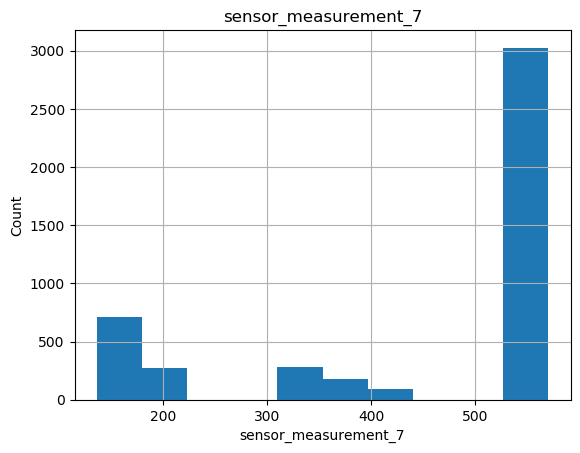

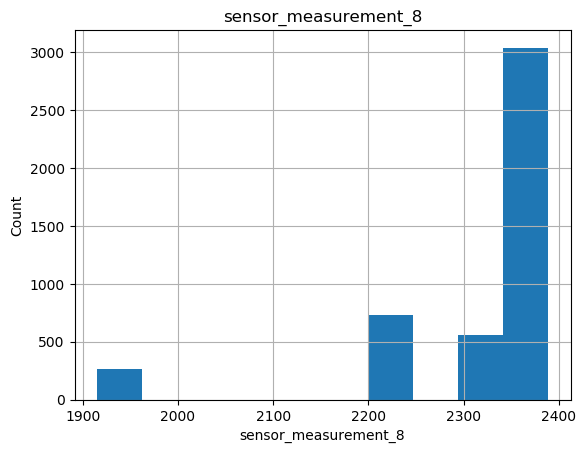

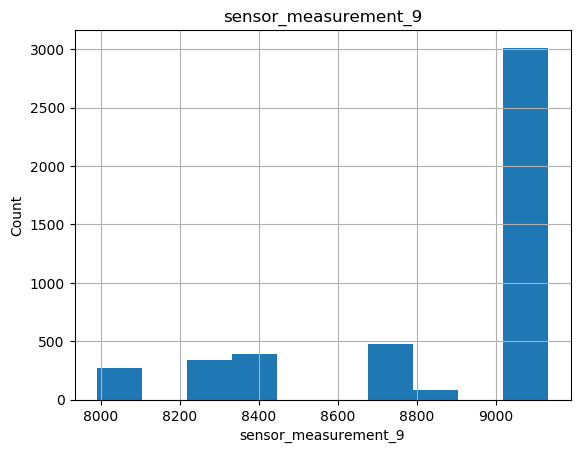

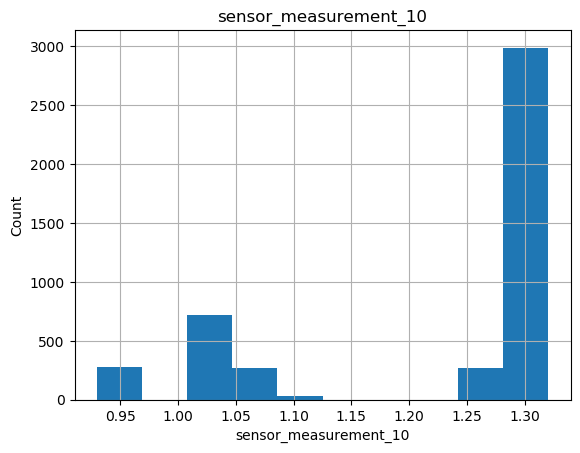

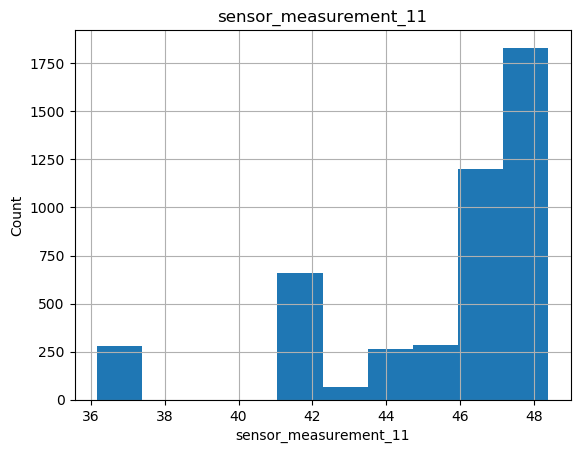

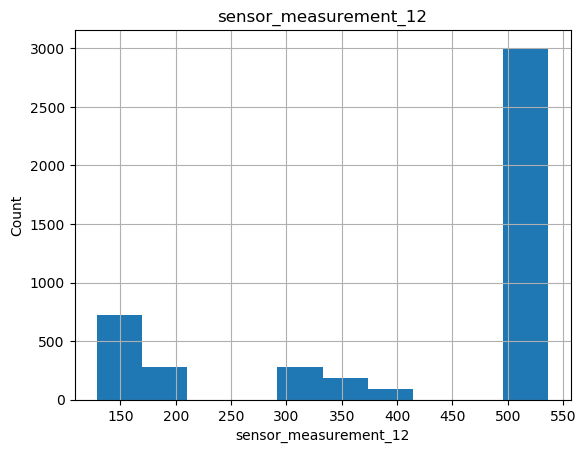

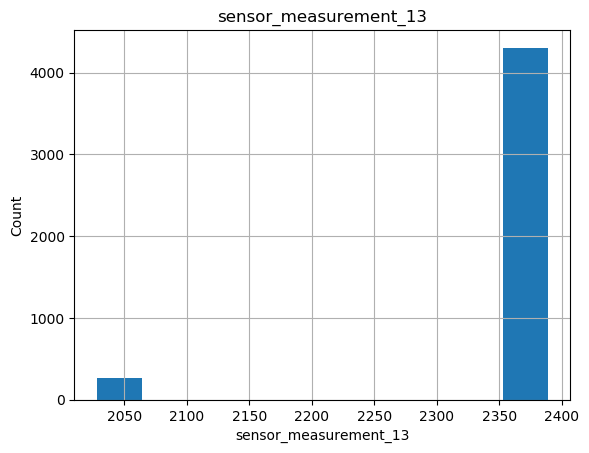

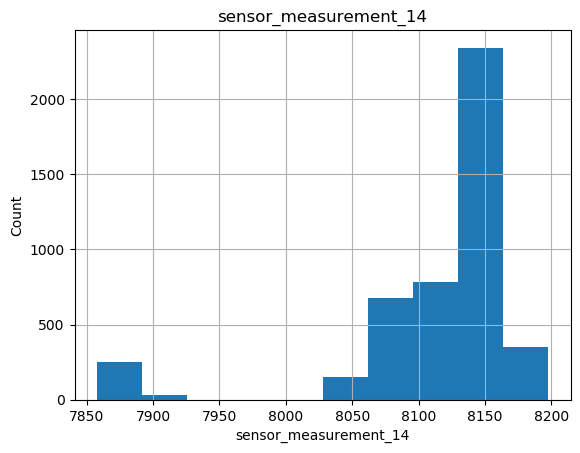

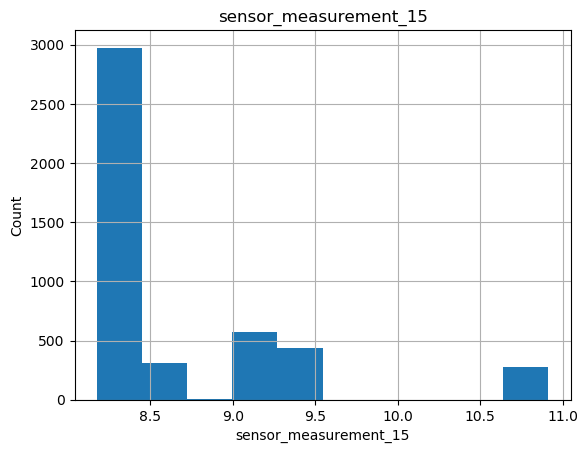

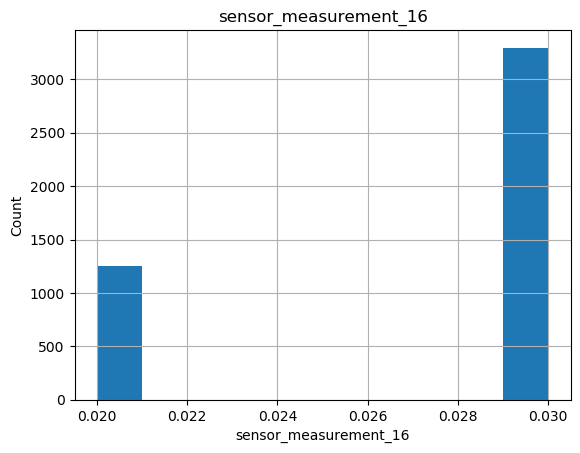

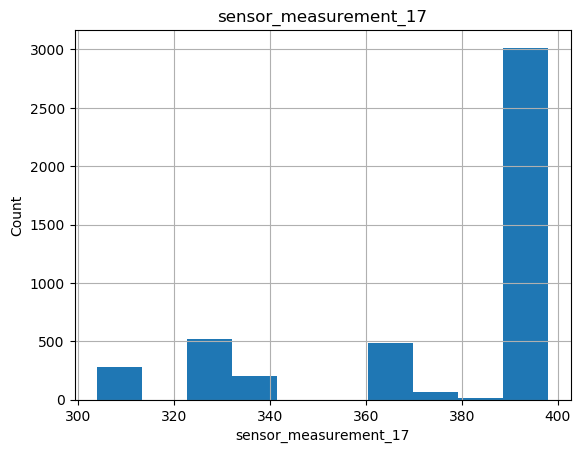

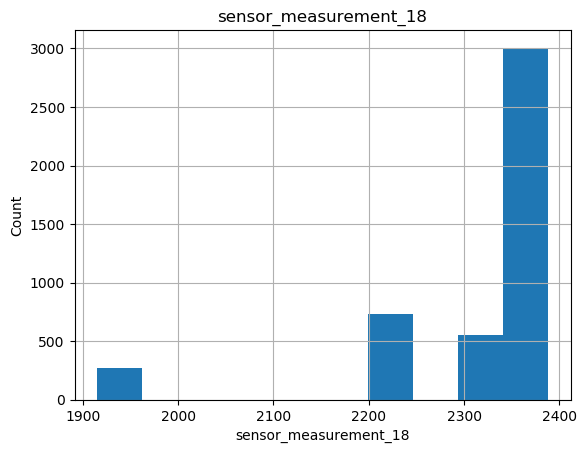

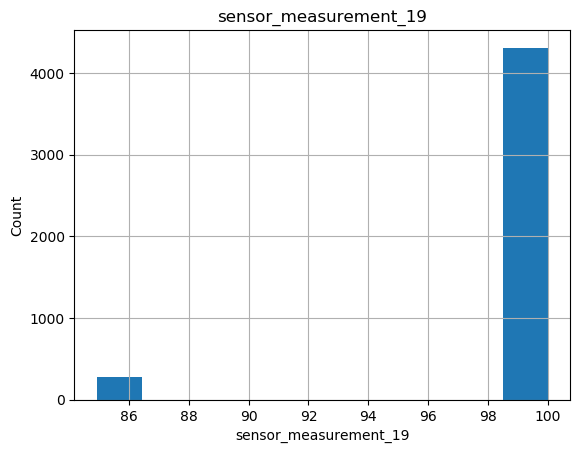

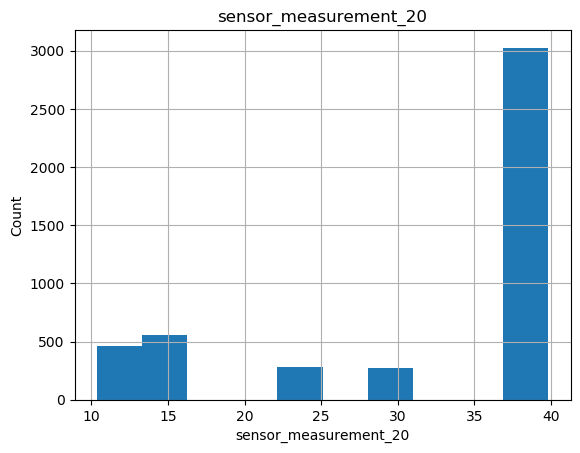

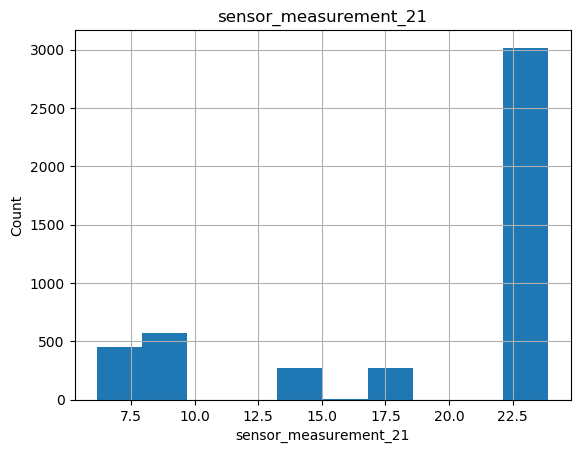

In [11]:
#Plotting histograms to see how features are distributed
for feature in cont_features:
    data=df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Most measuresments are centered around a median with some values being scattered. Since these are sensor data, it would make sense to fill missing values by forward filling assuming the previous information is correct or is in the same range. Forward filling would be done by unit number and date sequence.

In [12]:
#To check which units has a breakdown point
print('Units which had a breakdown -', df[df['status']==1]['unit_number'].unique())
#To check which units had no breakdown
print('Units which had NO breakdown -', list(set(df['unit_number'].unique()) - set(df[df['status']==1]['unit_number'].unique())))   


Units which had a breakdown - ['unit_9' 'unit_6' 'unit_1' 'unit_3' 'unit_4' 'unit_8' 'unit_2' 'unit_10'
 'unit_5']
Units which had NO breakdown - ['unit_7']


### Dealing with missing values

In [13]:
#No of values that are missing from each column
df.isna().sum() 

unit_number                0
time_stamp                 0
status                     0
operational_setting_1    248
operational_setting_2    231
operational_setting_3    249
sensor_measurement_1     239
sensor_measurement_2     252
sensor_measurement_3     248
sensor_measurement_4     237
sensor_measurement_5     269
sensor_measurement_6     245
sensor_measurement_7     255
sensor_measurement_8     223
sensor_measurement_9     240
sensor_measurement_10    267
sensor_measurement_11    235
sensor_measurement_12    258
sensor_measurement_13    248
sensor_measurement_14    230
sensor_measurement_15    247
sensor_measurement_16    269
sensor_measurement_17    241
sensor_measurement_18    255
sensor_measurement_19    236
sensor_measurement_20    223
sensor_measurement_21    240
dtype: int64

In [14]:
#for feature in cont_features:
 #   df[feature+'_nan']=np.where(df[feature].isnull(),1,0)
  #  df[feature].fillna(0,inplace=True)

In [15]:
#df['Imputed'] = np.where(pd.isnull(df).any(axis=1), 1, 0)  # if rows needs imputation

In [16]:
# No of gas turbines
total_no_of_units = df['unit_number'].unique()
total_no_of_units

array(['unit_8', 'unit_7', 'unit_2', 'unit_1', 'unit_6', 'unit_10',
       'unit_3', 'unit_9', 'unit_5', 'unit_4'], dtype=object)

In [17]:
#Group data by each unit 
grouped = df.groupby(df['unit_number'])  

In [18]:
#Create differnt objects based on the number of units if required for further exploration and analysis
gbl = globals()
for unit in total_no_of_units:
    gbl[unit] = grouped.get_group(unit).sort_values('time_stamp')

In [19]:
#Forward fill every unit accordingly with respect to date and unit number

for unit in total_no_of_units:
    gbl[unit] = gbl[unit].ffill(axis = 0)

In [20]:
# Function to check how many days far from breakdwon
def Days(data):  
    #If the unit had a breakdown then create sequence otherwise add -1 to differentiate
    if len(data.loc[data['status']==1])>0:
        data.loc[:,'days'] = pd.Series(data.loc[data['status']==1]['time_stamp'].values - data['time_stamp'].values,index=data.index)

        data['days'] = data['days'].dt.days.astype('int16')
    
        new_df = data
    else:
        data['days'] = -1
        new_df = data
    
    return new_df

In [21]:
# Function to make a new breakdown status (1) if within the 40 days
def target(row):     
    if row['days'] <= 40 and row['days'] >= 0:
        val = 1
    else:
        val =0      
    return val

In [22]:
#Loop through each unit running through the Days and target function
for unit in total_no_of_units:
    gbl[unit] = Days(gbl[unit])
    gbl[unit]['new_status'] = gbl[unit].apply(target, axis=1)

In [23]:
#Checking if the functions ran okay
gbl[unit].tail()

,unit_number,time_stamp,status,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,days,new_status
2211,unit_4,2017-01-29 12:00:00,0,-0.0013,0.0004,1.0,518.67,643.64,1603.37,1421.04,...,8189.37,8.2071,0.03,395.0,2388.0,100.0,39.65,23.6989,4,1
1989,unit_4,2017-01-30 12:00:00,0,0.0040,-0.0001,1.0,518.67,642.99,1604.37,1428.64,...,8190.60,8.2561,0.03,395.0,2388.0,100.0,39.59,23.6308,3,1
49,unit_4,2017-01-31 12:00:00,0,-0.0018,-0.0004,1.0,518.67,642.51,1601.88,1424.22,...,8190.84,8.2381,0.03,395.0,2388.0,100.0,39.75,23.7591,2,1
3998,unit_4,2017-02-01 12:00:00,0,0.0002,0.0003,1.0,518.67,643.20,1602.77,1427.02,...,8189.83,8.2063,0.03,395.0,2388.0,100.0,39.65,23.7930,1,1
3793,unit_4,2017-02-02 12:00:00,1,-0.0034,-0.0001,1.0,518.67,642.87,1604.35,1427.42,...,8191.36,8.2401,0.03,397.0,2388.0,100.0,39.79,23.7092,0,1


In [24]:
#Concatenating the units after cleaning and preprocessing 
data = pd.DataFrame()
for unit in total_no_of_units:
    data = data.append(gbl[unit], ignore_index=True)

#The first row of data would not have been forward filled. Hence, we can eliminate that     
data = data.dropna()    
print(data.shape)    

(4812, 29)


In [25]:
#No of columns present
data.columns

Index(['unit_number', 'time_stamp', 'status', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21', 'days', 'new_status'],
      dtype='object')

In [26]:
#Check no of days before failure 
data.groupby('unit_number')['new_status'].value_counts()

unit_number  new_status
unit_1       0             501
             1              41
unit_10      0             404
             1              41
unit_2       0             482
             1              41
unit_3       0             451
             1              41
unit_4       0             447
             1              41
unit_5       0             445
             1              41
unit_6       0             438
             1              40
unit_7       0             456
unit_8       0             416
             1              41
unit_9       0             404
             1              41
Name: new_status, dtype: int64

In [27]:
#number of breakdown points
len(data[data['new_status']==1])   

368

40 days instead of 41 days for unit 6 as one day of sensor data was missing(6th of Oct). 

### Boxplots to check if there is a difference between features by Status 0 and Status 1 

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


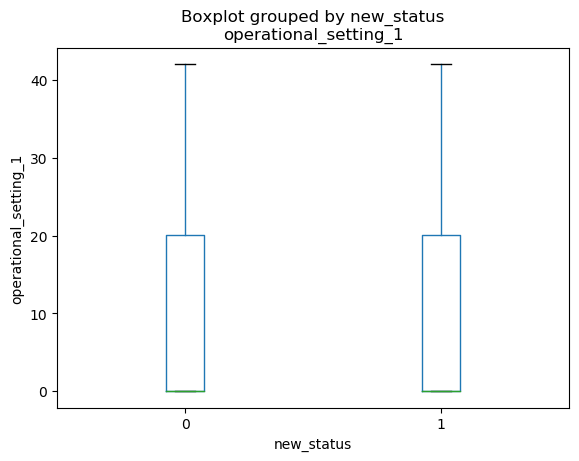

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


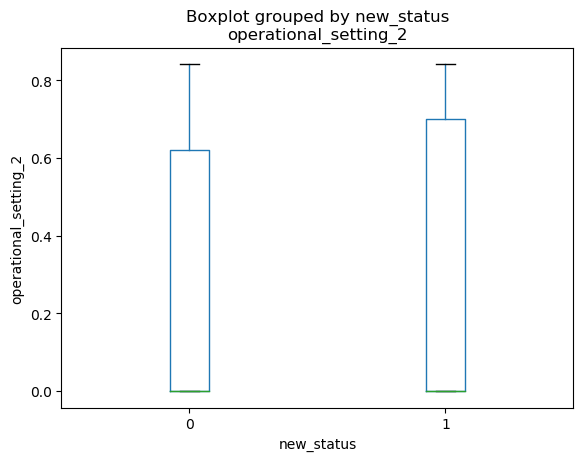

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


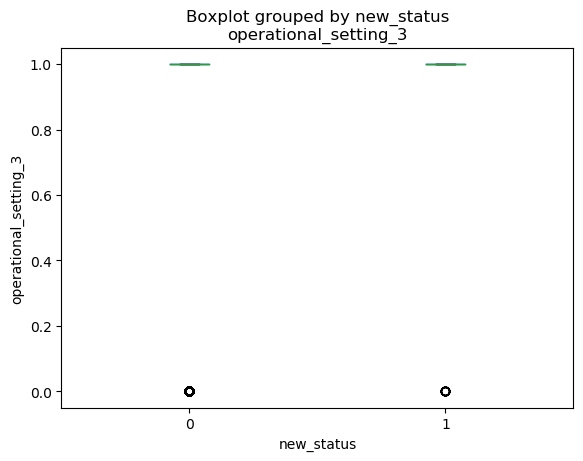

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


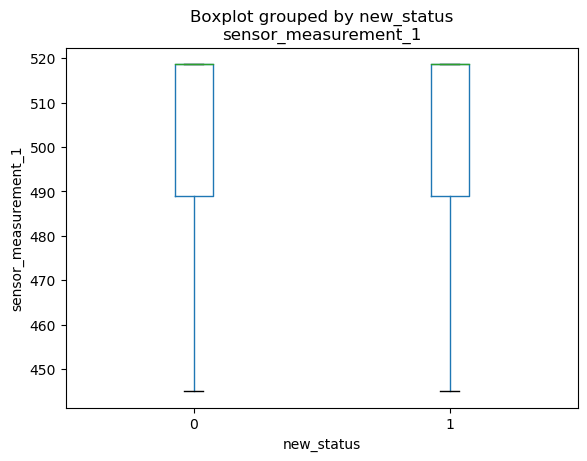

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


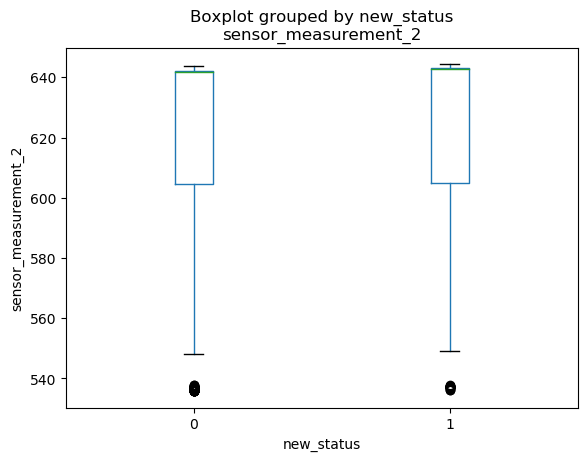

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


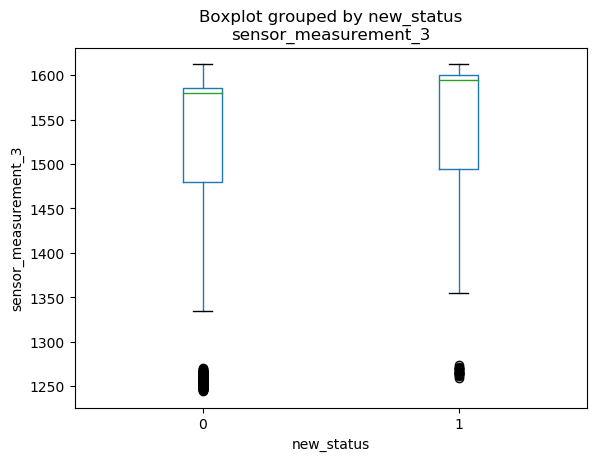

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


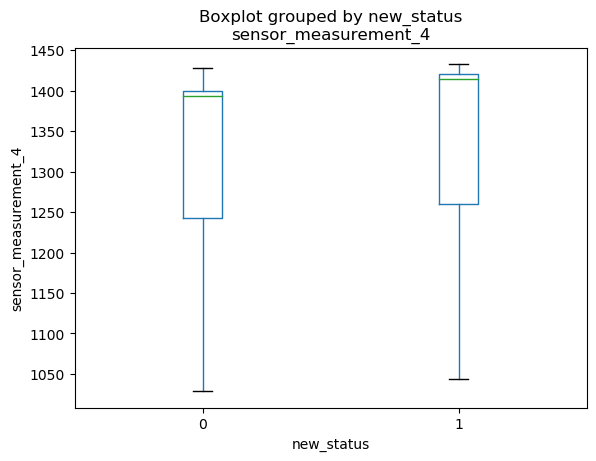

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


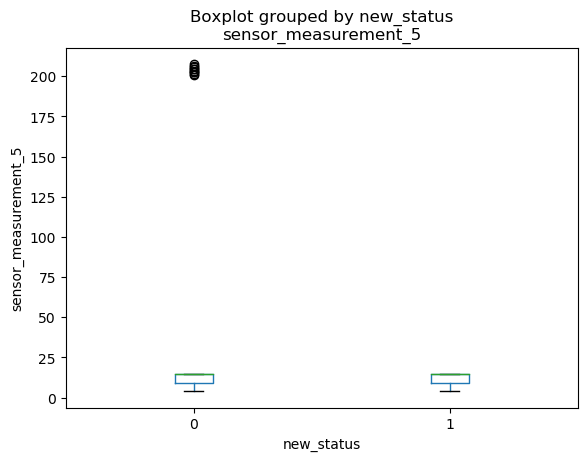

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


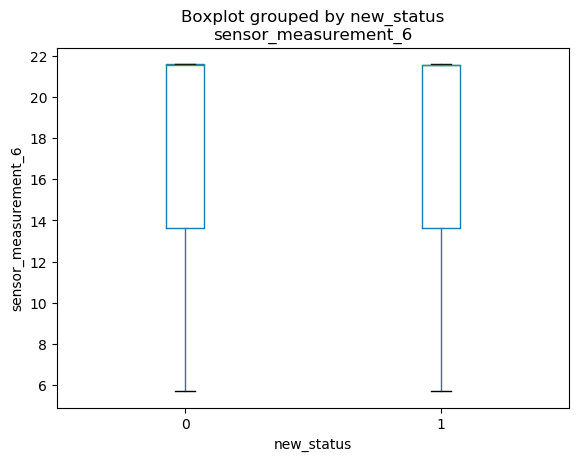

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


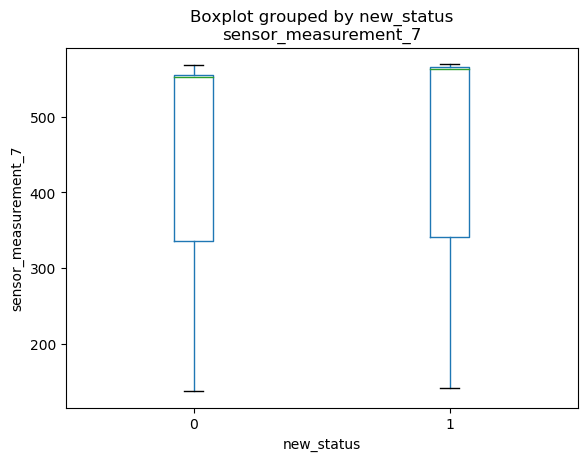

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


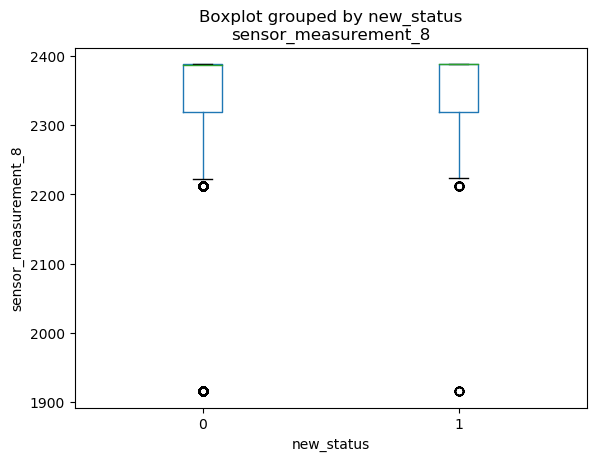

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


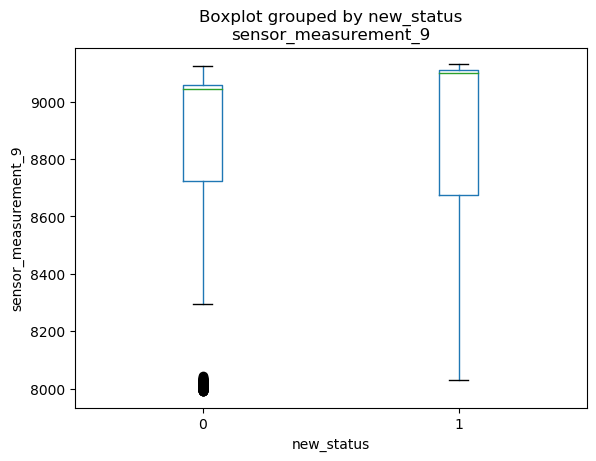

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


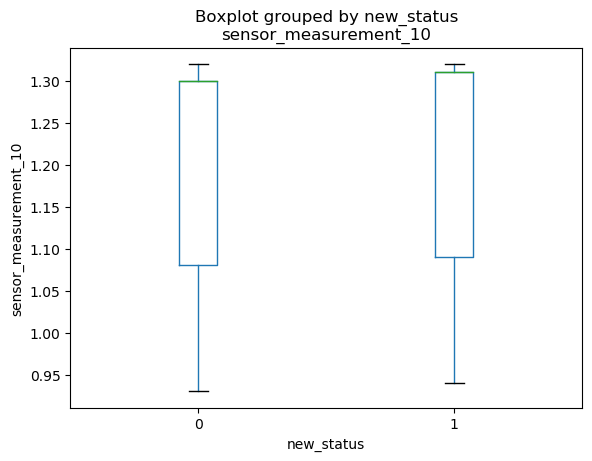

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


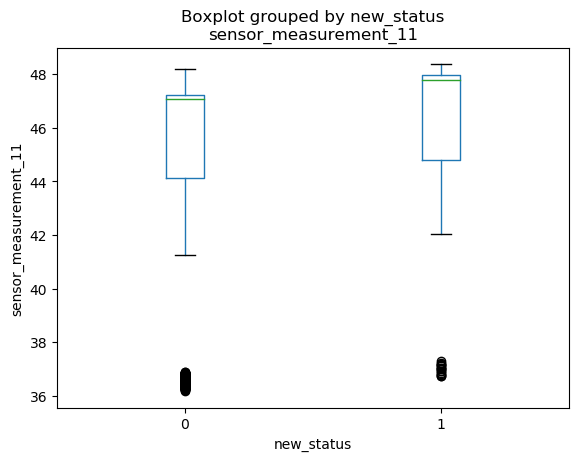

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


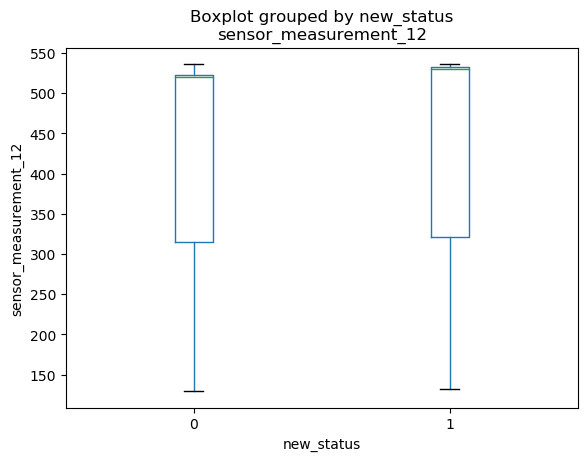

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


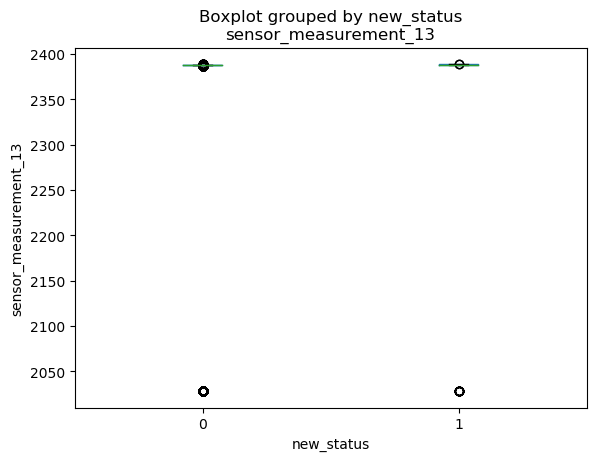

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


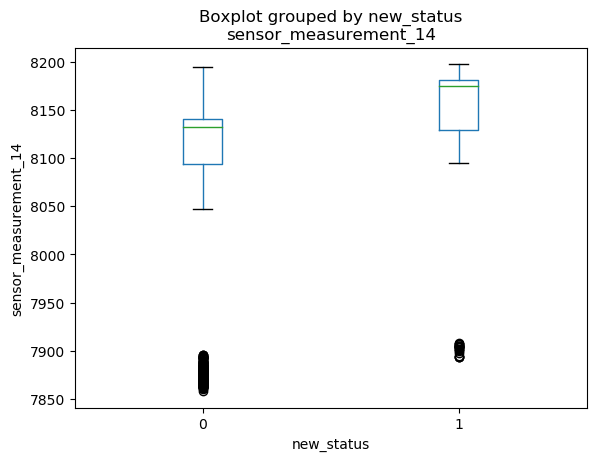

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


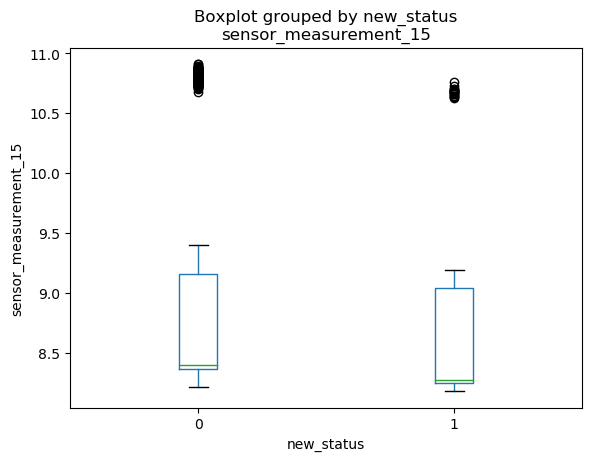

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


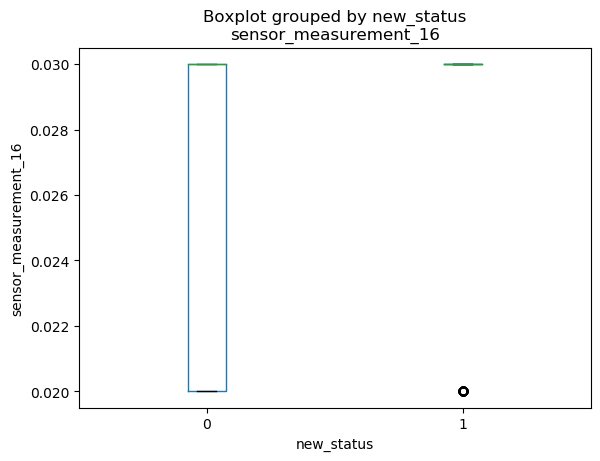

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


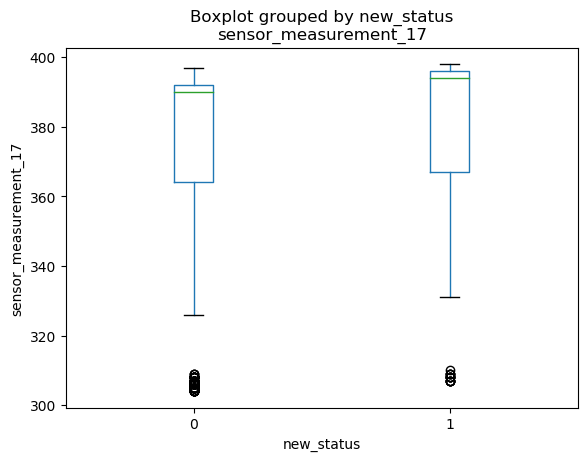

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


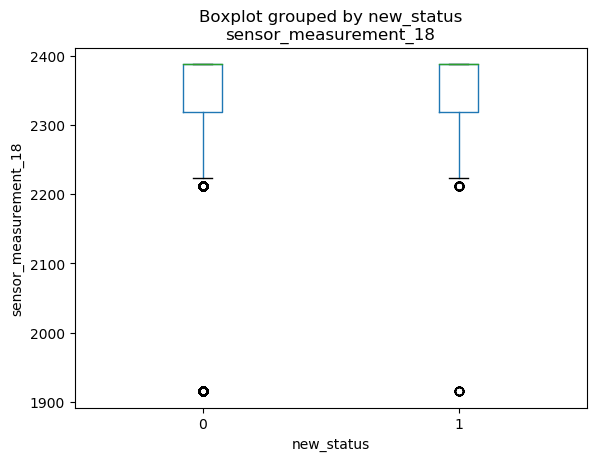

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


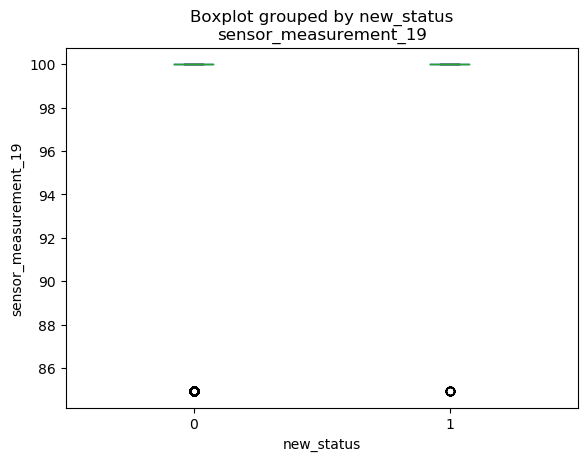

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


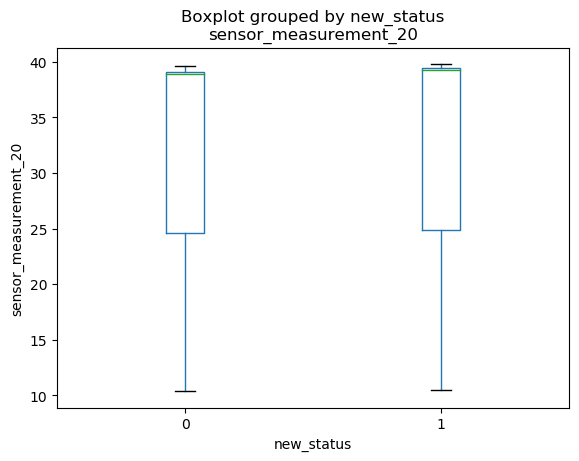

C:\Users\irfaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


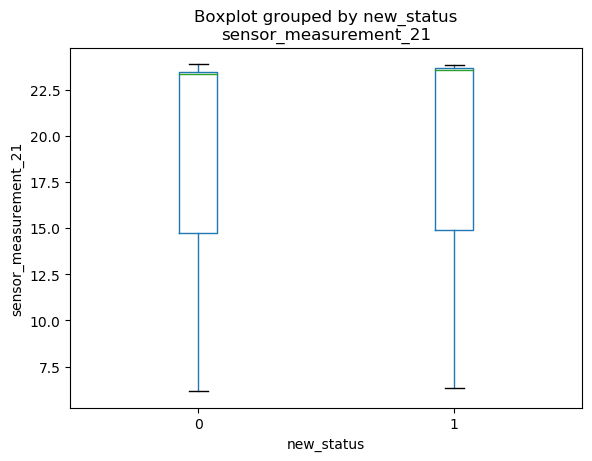

In [28]:
#Looping through all features 
for feature in cont_features:
    data.boxplot(by ='new_status', column =[feature], grid = False)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

These plots show a difference between the median among the different features grouped by new_status (1's and 0's derived from the logic of failure between 40-0 days)

## Model building

For a quick model, we will look at passing the data through a Random Forest as this model is quite robust to overfitting and does well with default paramaters. 

In [29]:
#The ratio of the target
data.new_status.value_counts(normalize=True)

0    0.923525
1    0.076475
Name: new_status, dtype: float64

In [30]:
data.columns

Index(['unit_number', 'time_stamp', 'status', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21', 'days', 'new_status'],
      dtype='object')

In [31]:
#Dropping columns which will not be modelled
x = data.drop(['unit_number', 'time_stamp', 'status', 'days','new_status'], axis = 1)

In [32]:
#Dependent variable is the new status
y = data['new_status'] 

### Split the data into Train and Test in the proportion of 80:20

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Print the shape
print(X_train.shape)
print(X_test.shape)

#Creating a copy for exporting the predictions
X_test_org = X_test.copy()
X_test_org['new_status'] = y_test

(3849, 24)
(963, 24)


### Scaling

In [34]:
#Scale the data between 0 to 1 using the Min and Max. Usually this is not necessary for tree based models. 
#However, it is a requirement for linear models so you reach convergence 

#We use the train data to fit the scaler and then transform the test using the paramters from the train set. 
#This is done so that there is no data leakage
from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler()
scaler.fit(X_train)

normalized_x_train = pd.DataFrame(scaler.transform(X_train))

In [35]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test[X_train.columns]))

In [36]:
#X_train = np.array(normalized_x_train)
#X_test = np.array(normalized_x_test)

#y_train = np.array(y_train)
#y_test = np.array(y_test)

### Dealing with Imbalanced Data

Since the data is imbalanced with ~92% 0's and 8% 1's, we will try to artificially sample to represent the underrepresented class. We will oversample the training data only since the model learns using this set

In [37]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample = SMOTE(sampling_strategy='auto').fit_sample(normalized_x_train,y_train.values.ravel())

In [38]:
X_train = np.array(X_resample)
X_test = np.array(normalized_x_test)

y_train = np.array(y_resample)
y_test = np.array(y_test)

In [39]:
#len(y_train[y_train==1])

### Random Forest classifier 

In [40]:
#Import Randomforest classifier and fit on the train data
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=501, n_jobs=-1)

random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=501, n_jobs=-1)

In [41]:
# Making predictions
y_pred = random_forest.predict(X_test)
y_pred_prob = random_forest.predict_proba(X_test)

X_test_org['Prediction_RF'] = y_pred_prob[:,1]
X_test_org.to_csv('Test_set.csv',index=False)

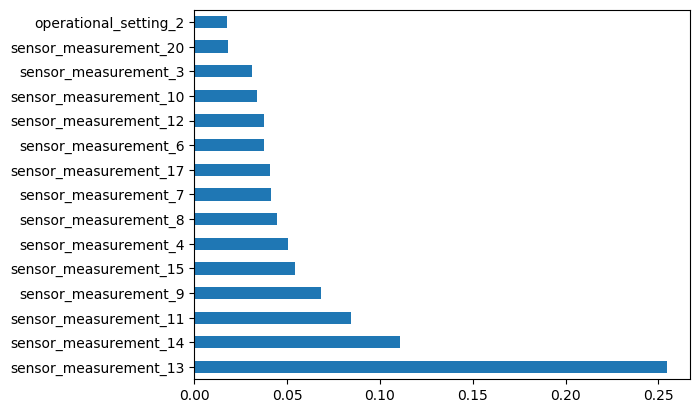

In [42]:
#Printing the important features
feat_importances = pd.Series(random_forest.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Model Evaluation

In [43]:
#Code to make a confusion matrix which is visually understandable
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.`.
    """

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[ 57   3]
 [ 13 890]]


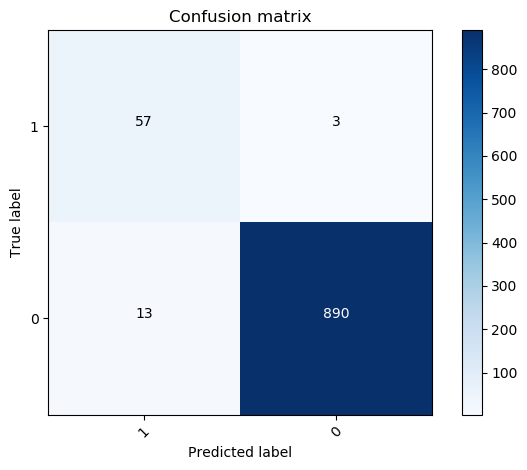

In [44]:
cnf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
plot_confusion_matrix(cnf_matrix,classes=[1,0])

In [45]:
target_names = ['Status 0', 'Status 1']
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Status 0       1.00      0.99      0.99       903
    Status 1       0.81      0.95      0.88        60

    accuracy                           0.98       963
   macro avg       0.91      0.97      0.93       963
weighted avg       0.99      0.98      0.98       963



Assumption - The evaluation metric of interest would be Recall of the model as this would make sure we predict in advance if a machine would fail. Using this we also tend to have a lot of false alarms/false positives. The cost of sudden downtime of a gas turbine would mean a bigger cost than the cost of maintenance of false alarms. We can try to improve our precision using other models or feature engineer to make it better. 

Also, the problem associated with a classification model is we would not be aware of the remaining life of the gas turbine. A better way of dealing this would be building a model which calculates the RUL (Remaining useful life), as this would let the turbine be optimally used till the end of life and saving more on costs of maintenance.